In [3]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 13.1 MB/s 
     |████████████████████████████████| 362 kB 69.9 MB/s 
     |████████████████████████████████| 1.2 MB 66.8 MB/s 
     |████████████████████████████████| 4.4 MB 49.2 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 140 kB 71.7 MB/s 
     |████████████████████████████████| 1.1 MB 51.7 MB/s 
     |████████████████████████████████| 212 kB 69.4 MB/s 
     |████████████████████████████████| 596 kB 70.6 MB/s 
     |████████████████████████████████| 127 kB 70.7 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 271 kB 75.3 MB/s 
     |████████████████████████████████| 144 kB 67.1 MB/s 
     |████████████████████████████████| 6.6 MB 54.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.

In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [5]:
# Download images of different bear categories
def download_images_ddg(img_category, img_types, num_images):
    if not path.exists():
        path.mkdir()
        for o in img_types:
            dest = (path/o)
            dest.mkdir(exist_ok=True)
            results = search_images_ddg(f'{str(o)} {img_category}', max_images=num_images)
            for u in range(len(results)):
                try:
                    download_url(url=results[u], 
                                 dest=f'{dest}/{str(o)}-{str(u+1)}.jpg', 
                                 timeout=400, 
                                 show_progress=False)
                except:
                    print(f'not found {results[u]}')
                    continue

In [6]:
# Define image category and image types
img_category = 'dog'
img_types = ['pomeranian','husky','bulldog']
path = Path(img_category)

In [7]:
download_images_ddg(img_category, img_types, num_images=100)

not found https://www.xtree.com.au/images/2019/03/21/1424/teacup-pomeranian-puppies-for-you_1.jpg
not found https://splashanddashfordogs.com/wp-content/uploads/2017/11/pomeranian-haircuts-1030x620.jpg
not found http://www.puppiesclub.com/wp-content/uploads/2016/03/brown-pomeranian-puppy.jpg
not found http://www.zastavki.com/pictures/2560x1600/2011/Animals_Dogs_Pomeranian_spitz-dogs_029042_.jpg
not found http://www.zastavki.com/pictures/originals/2013/Animals___Dogs_Little_puppies_Siberian_Husky_048494_.jpg
not found http://www.zastavki.com/pictures/originals/2013/Animals___Dogs_The_Puppy_Siberian_Husky_048483_.jpg
not found http://www.zastavki.com/pictures/originals/2013/Animals___Dogs_Brown_Siberian_Husky_048478_.jpg
not found http://www.zastavki.com/pictures/originals/2017Animals___Dogs_The_Husky_breed_dog_lies_with_a_sad_face_117029_.jpg
not found http://www.zastavki.com/pictures/originals/2013/Animals___Dogs_Serious_American_bulldog_closeup_049128_.jpg
not found https://www.luxuryp

In [8]:
# Check for failed images
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

In [9]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [10]:
fns = get_image_files(path)
fns

(#282) [Path('dog/bulldog/bulldog-39.jpg'),Path('dog/bulldog/bulldog-51.jpg'),Path('dog/bulldog/bulldog-23.jpg'),Path('dog/bulldog/bulldog-75.jpg'),Path('dog/bulldog/bulldog-66.jpg'),Path('dog/bulldog/bulldog-62.jpg'),Path('dog/bulldog/bulldog-48.jpg'),Path('dog/bulldog/bulldog-25.jpg'),Path('dog/bulldog/bulldog-24.jpg'),Path('dog/bulldog/bulldog-56.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#0) []

In [12]:
failed.map(Path.unlink);

In [13]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [14]:
dls = dogs.dataloaders(path)

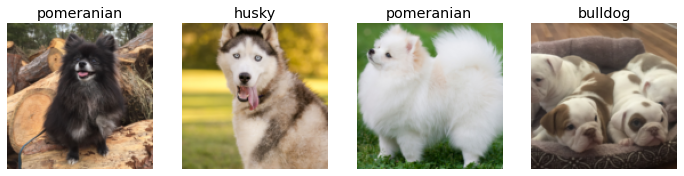

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

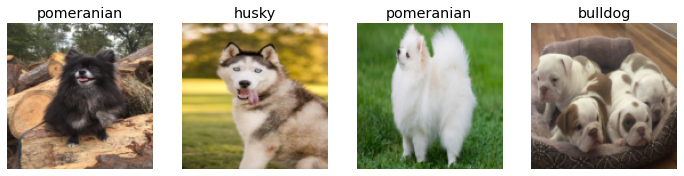

In [16]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

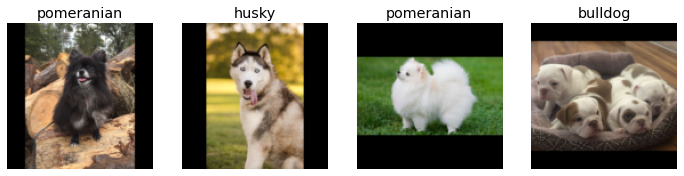

In [17]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

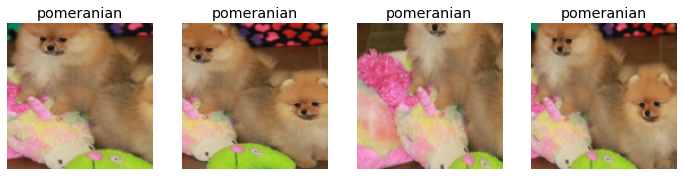

In [18]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

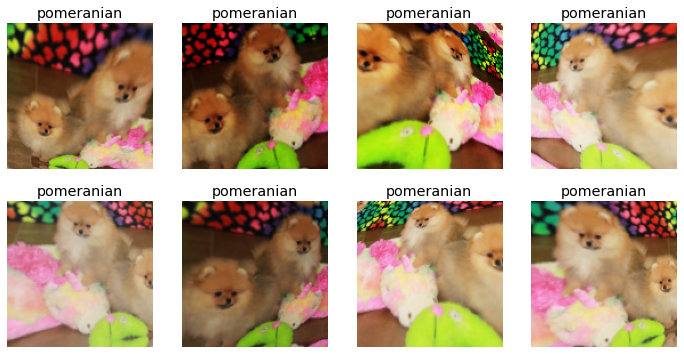

In [19]:
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [20]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.548474,0.453205,0.196429,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.353954,0.077433,0.017857,00:54
1,0.186946,0.015578,0.000000,00:53
2,0.125780,0.011122,0.000000,00:54
3,0.093099,0.011839,0.000000,00:54


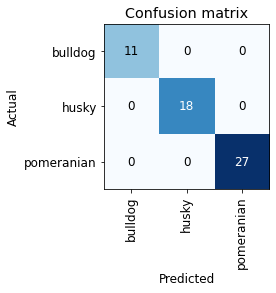

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

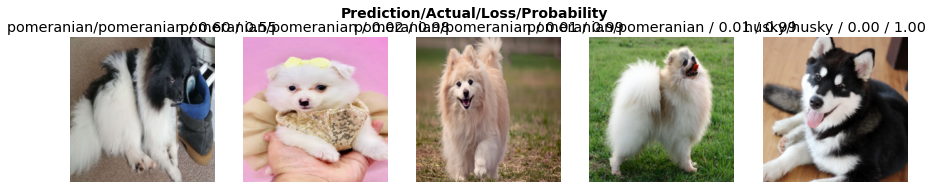

In [23]:
interp.plot_top_losses(5, nrows=1)

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [25]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [26]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('images/grizzly.jpg')

FileNotFoundError: ignored

In [30]:
learn_inf.dls.vocab

['bulldog', 'husky', 'pomeranian']

In [31]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [32]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [33]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [34]:
pred,pred_idx,probs = learn_inf.predict(img)

NameError: ignored

In [35]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: ignored

In [36]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [37]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [38]:
btn_upload = widgets.FileUpload()

In [39]:
VBox([widgets.Label('Select your dog!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [40]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 

In [ ]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 

In [41]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()